<a href="https://colab.research.google.com/github/janhavishembade/Yes_Bank_Stock_Close_Price_prediction/blob/main/Yes_Bank_Stock_Closing_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Probelm Statement**

Yes Bank is well known bank in indian financial domain.It has been in the news because of fruad case involving rana kapoor.It was very interesting to see that how its impacted on stock prices of the company.The main objective of this project is to stok closing price of the month.The Dataset having the attributes like closing,starting,highest and lowest stock prices of every month.

**Buisness Context**

In this Finance word stock trading is one of the most important activity.It is an act trying to determine the future value of stock other financial instruments traded on a financial exchange.Basically quantitative trader with a lot of money from stock markets buy stock derivatives and equites at a cheap price and later on selling them at a high price.

**Connecting to drive**

In [ ]:
#mount to drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Importing Library**

In [ ]:
#import packages and Libraries
import numpy as np  # numerical python library
import pandas as pd # panel data 
import seaborn as sns # visualize library
import matplotlib.pyplot as plt # visulize library
from sklearn.linear_model import LinearRegression # import Model from library
from sklearn.model_selection import train_test_split  #split train and test data
from sklearn.model_selection import (cross_val_score,TimeSeriesSplit)  # split train and test data on a timeseries
from datetime import datetime


**Setting the file path from drive**

In [ ]:
#set the path from google drive
filepath="/content/drive/MyDrive/AlmaBetter/Capstone Project2_Yes_Bank_Stock_Closing_Price_Prediction/data_YesBank_StockPrices.csv"

**Load The Dataset From FilePath**

In [ ]:
#Inserting file path from google drive to read the csv file
df=pd.read_csv(filepath)
df

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41
...,...,...,...,...,...
180,Jul-20,25.60,28.30,11.10,11.95
181,Aug-20,12.00,17.16,11.85,14.37
182,Sep-20,14.30,15.34,12.75,13.15
183,Oct-20,13.30,14.01,12.11,12.42


**Lets Take a deep dive on our Dataset to know more about it**

In [ ]:
df.shape  # It gives shape about dataset i.e rows and columns

(185, 5)

So the dataframe consist of 185 rows and 5 columns in it

In [ ]:
#know about columns
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close'], dtype='object')

**More About Column Name**


**Date**:- Its a stock Date

---
**Open**:- Its a stock open price

---
**High**:- stock High price

---
**Low**:- stock low price

---


**Close**:- stock close price





In [ ]:
#lets takes first Five rows
df.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


In [ ]:
#lets takes last Five rows
df.tail()

,Date,Open,High,Low,Close
180,Jul-20,25.60,28.30,11.10,11.95
181,Aug-20,12.00,17.16,11.85,14.37
182,Sep-20,14.30,15.34,12.75,13.15
183,Oct-20,13.30,14.01,12.11,12.42
184,Nov-20,12.41,14.90,12.21,14.67


**Summerize The Data**

In [ ]:
#Lets take information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


In [ ]:
#Lets describes the data
df.describe()

,Open,High,Low,Close
count,185.000000,185.000000,185.000000,185.000000
mean,105.541405,116.104324,94.947838,105.204703
std,98.879850,106.333497,91.219415,98.583153
min,10.000000,11.240000,5.550000,9.980000
25%,33.800000,36.140000,28.510000,33.450000
50%,62.980000,72.550000,58.000000,62.540000
75%,153.000000,169.190000,138.350000,153.300000
max,369.950000,404.000000,345.500000,367.900000


Its Give informtion about count,mean std,min and IQR ranges like 25%,50%,75% and max terms.

**Lets cheks the null values**

In [ ]:
#lets chek the null values and if present we try to fill it
df.isnull().sum()
#df.isna()  #it gies the data values in boolean format that is True and False

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

So now here we dont have any missing values data already is in clean format.

**Lets chek duplicate values**

In [ ]:
# cheking of duplicate values
len(df[df.duplicated()])

0

**So overall here its seem like dataset doesnot contain any missing values.there are total 5 attributes of column is present.data have 4 column which contains the float values and 1 column contain object type values.No duplicate value is present.**

In [ ]:
# convert string object to datetime object
df['Date'] = df['Date'].apply(lambda x: datetime.strptime(x, "%b-%y"))

**lets try to analyze data with target variable "close".**



/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


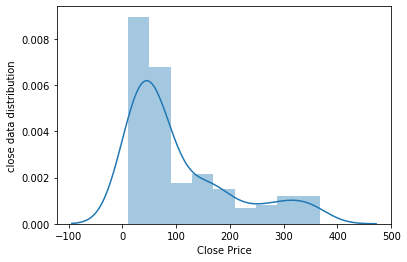

In [ ]:
# so here we are trying to analysis with close varaible
sns.distplot(df['Close'])
plt.xlabel('Close Price')
plt.ylabel('close data distribution')
plt.show()

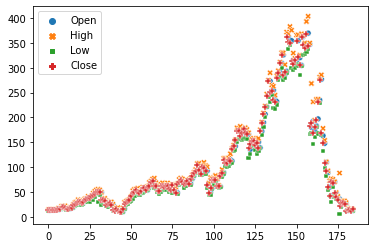

In [ ]:
#Lets do the scatter plot for independent and dependt variable
sns.scatterplot(data=df)

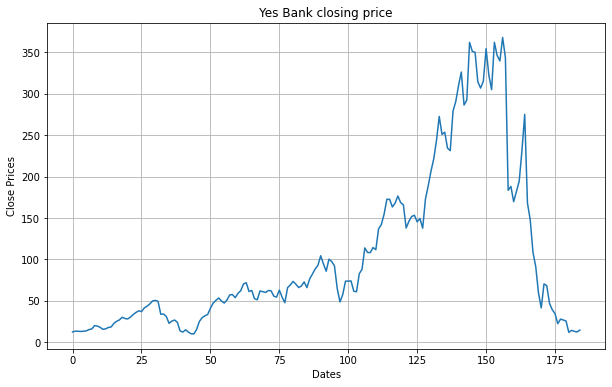

In [ ]:
#plot close price
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Close Prices')
plt.plot(df['Close'])
plt.title('Yes Bank closing price')
plt.show()

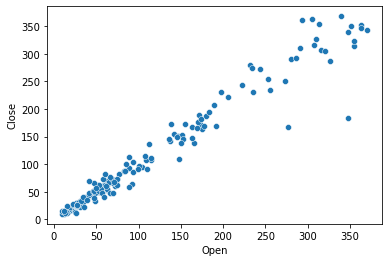

In [ ]:
#open vs close
sns.scatterplot(data=df,y="Close",x="Open")

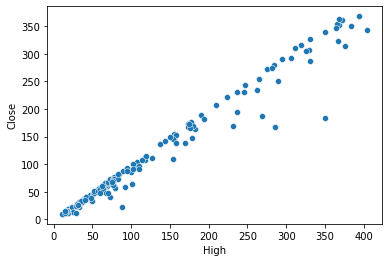

In [ ]:
#high vs close
sns.scatterplot(data=df,x="High",y="Close")

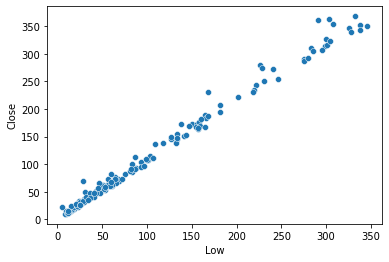

In [ ]:
#Low vs close
sns.scatterplot(data=df,x="Low",y="Close")

**Lets check correlation**

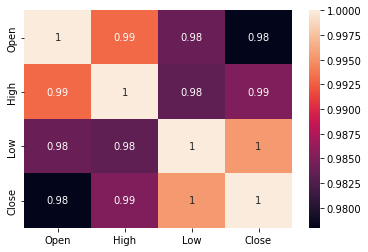

In [ ]:
#check the correlation
sns.heatmap(df.corr(),annot=True)

From above its seem like every feature is extremly correlated with each other so taking just average of feature would suffice for our regression model.So as assummes there is no multicollinearity in features

**Feature Engineering**

In [ ]:
#Numeric Aggregation
#Aggregation type: Mean, median, mode, standard deviation, variance, count etc.
#creating new feature of dataset based on average feature in dataset
df['new_feature']=df[['Open','High','Low','Close']].mean(axis=1).round(2)

In [ ]:
df

,Date,Open,High,Low,Close,new_feature
0,2005-07-01,13.00,14.00,11.25,12.46,12.68
1,2005-08-01,12.58,14.88,12.55,13.42,13.36
2,2005-09-01,13.48,14.87,12.27,13.30,13.48
3,2005-10-01,13.20,14.47,12.40,12.99,13.26
4,2005-11-01,13.35,13.88,12.88,13.41,13.38
...,...,...,...,...,...,...
180,2020-07-01,25.60,28.30,11.10,11.95,19.24
181,2020-08-01,12.00,17.16,11.85,14.37,13.84
182,2020-09-01,14.30,15.34,12.75,13.15,13.88
183,2020-10-01,13.30,14.01,12.11,12.42,12.96


**Lets check the relationship between independent and dependent variable with new features**

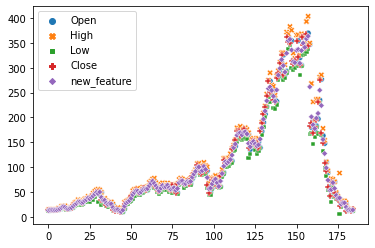

In [ ]:
sns.scatterplot(data=df)

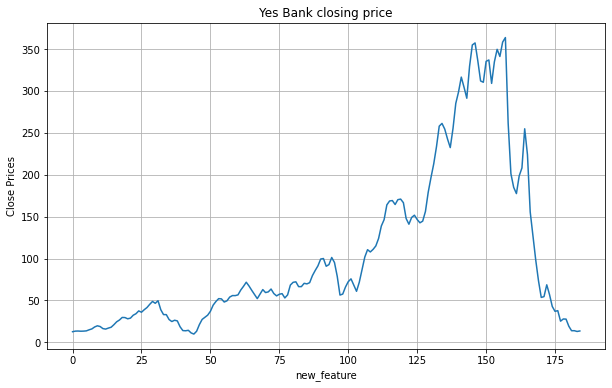

In [ ]:
#plot news price
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('new_feature')
plt.ylabel('Close Prices')
plt.plot(df['new_feature'])
plt.title('Yes Bank closing price')
plt.show()

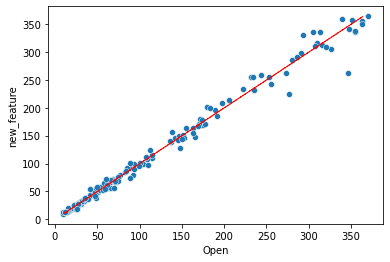

In [ ]:
#open vs New_feature
sns.scatterplot(x='Open',y='new_feature',data=df)
z = np.polyfit(df['new_feature'], df['Close'], 1)
y_hat = np.poly1d(z)(df['new_feature'])
plt.plot(df['new_feature'], y_hat, "r--", lw=1)

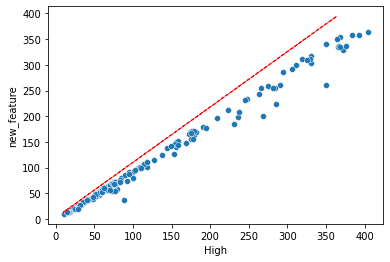

In [ ]:
#High vs new Feature
sns.scatterplot(x='High',y='new_feature',data=df)
z = np.polyfit(df['new_feature'], df['High'], 1)
y_hat = np.poly1d(z)(df['new_feature'])
plt.plot(df['new_feature'], y_hat, "r--", lw=1)

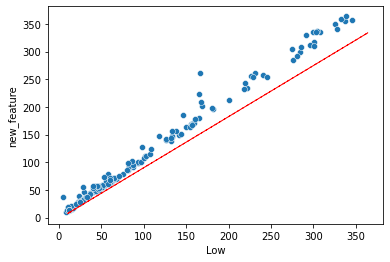

In [ ]:
#High vs new Feature
sns.scatterplot(x='Low',y='new_feature',data=df)
z = np.polyfit(df['new_feature'], df['Low'], 1)
y_hat = np.poly1d(z)(df['new_feature'])
plt.plot(df['new_feature'], y_hat, "r--", lw=1)

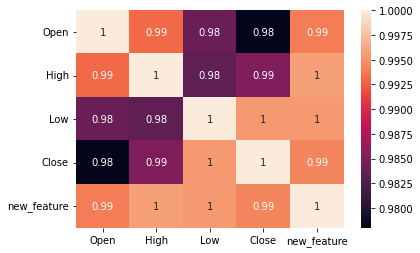

In [ ]:
#Lets chek correlation
sns.heatmap(df.corr(),annot=True)

So from graph its seem like there is multicollinearity is present.To reduce this we need to use regularization method.this is good when we have to predict each dependent variable

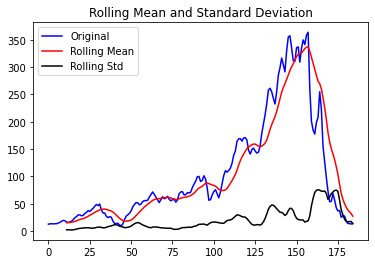

Results of dickey fuller test
Test Statistics                 -2.501900
p-value                          0.115013
No. of lags used                11.000000
Number of observations used    173.000000
critical value (1%)             -3.468726
critical value (5%)             -2.878396
critical value (10%)            -2.575756
dtype: float64


In [ ]:
#Test for staionarity
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    #Plot rolling statistics:
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)
    
    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
    # output for dft will give us without defining what the values are.
    # hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)
    
test_stationarity(df['new_feature'])